In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                        columns=np.append(wine['feature_names'], 'target'))

In [3]:
# Feature Selection
features = wine['feature_names']

In [4]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(wine_df, test_size=0.2, random_state=42)

In [5]:
# Preprocessing
def preprocess_data(data, features):
    X = data[features]
    y = data['target']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

In [15]:
# Train a Decision Tree Classifier model
def train_decision_tree(X_train, y_train, ccp_alpha=0.0):
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    dt_model.fit(X_train, y_train)
    return dt_model

In [7]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

In [8]:
# Visualize the tree
def plot_decision_tree(model, features):
    plt.figure(figsize=(15, 10))
    plot_tree(model, feature_names=features, class_names=wine.target_names, filled=True, rounded=True)
    plt.show()

In [9]:
# Preprocess the training data
X_train_scaled, y_train = preprocess_data(train_data, features)

In [16]:
# Train a Decision Tree Classifier model without pruning
dt_model_unpruned = train_decision_tree(X_train_scaled, y_train)

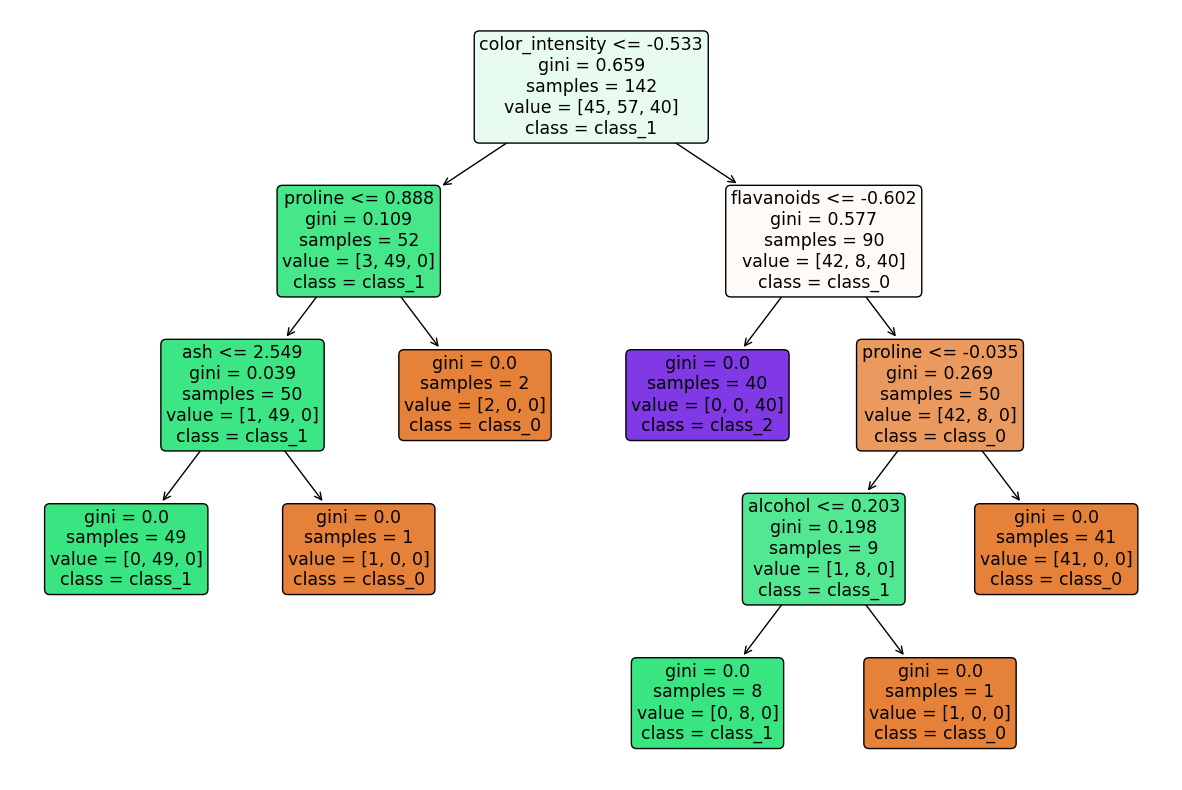

In [17]:
# Visualize the unpruned tree
plot_decision_tree(dt_model_unpruned, features)

In [18]:
# Extract the cost complexity pruning path
path = dt_model_unpruned.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [19]:
# Train Decision Tree models with different pruning parameters
models = []
for ccp_alpha in ccp_alphas:
    dt_model = train_decision_tree(X_train_scaled, y_train, ccp_alpha=ccp_alpha)
    models.append(dt_model)

In [20]:
# Evaluate and select the best-pruned model
best_model = None
best_accuracy = 0.0
for dt_model in models:
    X_test_scaled, y_test = preprocess_data(test_data, features)
    accuracy, _, _ = evaluate_model(dt_model, X_test_scaled, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = dt_model

C:\Users\rvign\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rvign\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rvign\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

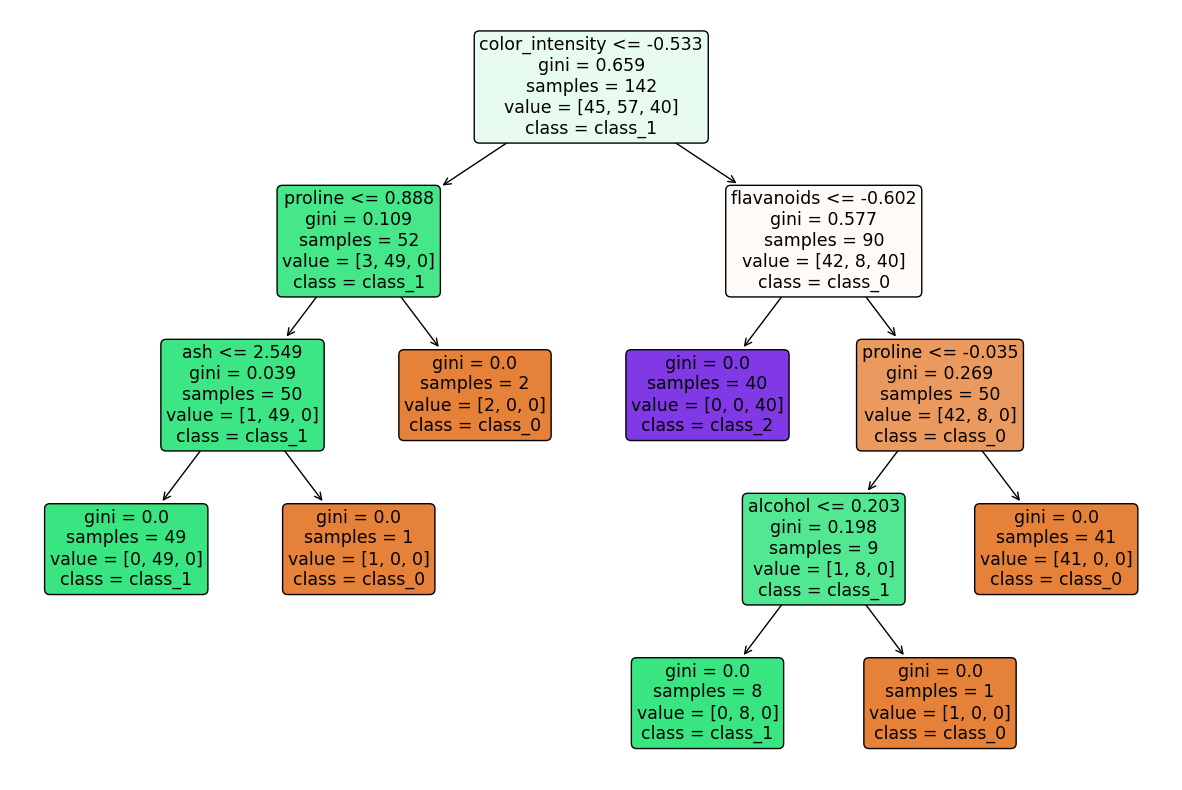

In [21]:
# Visualize the best-pruned tree
plot_decision_tree(best_model, features)

In [22]:
# Evaluate the best-pruned model
X_test_scaled, y_test = preprocess_data(test_data, features)
accuracy, report, confusion_matrix = evaluate_model(best_model, X_test_scaled, y_test)
print(f'Accuracy of the best-pruned model on the test set: {accuracy:.2f}')
print('\nClassification Report:')
print(report)
print('\nConfusion Matrix:')
print(confusion_matrix)

Accuracy of the best-pruned model on the test set: 0.94

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        14
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


In [23]:
# Cross-validate the best-pruned model
X_all_scaled, y_all = preprocess_data(wine_df, features)
cross_val_scores = cross_val_score(best_model, X_all_scaled, y_all, cv=5, scoring='accuracy')
print(f'\nCross-Validation Scores: {cross_val_scores}')


Cross-Validation Scores: [0.91666667 0.83333333 0.83333333 0.91428571 0.85714286]
